Lambda School Data Science

*Unit 1, Sprint 1, Module 2*

---

# Make Features 

- Student should be able to understand the purpose of feature engineering
- Student should be able to work with strings in pandas
- Student should be able to work with dates and times in pandas
- Student should be able to modify or create columns of a dataframe using the `.apply()` function


Helpful Links:
- [Minimally Sufficient Pandas](https://medium.com/dunder-data/minimally-sufficient-pandas-a8e67f2a2428)
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series
- [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)

# [Objective](#feature-engineering) - The Purpose of Feature Engineering



## Overview

Feature Engineering is the process of using a combination of domain knowledge, creativity and the pre-existing columns of a dataset to create completely new columns.

 Machine Learning models try to detect patterns in the data and then associate those patterns with certain predictions. The hope is that by creating new columns on our dataset that we can expose our model to new patterns in the data so that it can make better and better predictions.

This is largely a matter of understanding how to work with individual columns of a dataframe with Pandas --which is what we'll be practicing today!

## Follow Along

Columns of a dataframe hold each hold a specific type of data. Lets inspect some of the common datatypes found in datasets and then we'll make a new feature on a dataset using pre-existing columns.

In [13]:
import pandas as pd

In [14]:
# Lets take a look at the Ames Iowa Housing Dataset:
'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Specific Columns hold specific kinds of data

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
dtype: object

Some columns hold integer values like the `BedroomAbvGr` which stands for "Bedrooms Above Grade." This is the number of non-basement bedrooms in the home.

For more information on specific column meanings view the [data dictionary](https://github.com/ryanleeallred/datasets/blob/master/Ames%20Housing%20Data/data_description.txt).

In [17]:
# Look at the first ten rows of the `BedroomAbvGr` column.
# Looks like integers to me!


,BedroomAbvGr,Fireplaces
0,3,0


In [18]:
# another way to call columns: dot method


0    3
1    3
2    3
3    3
4    4
5    1
6    3
7    3
8    2
9    2
Name: BedroomAbvGr, dtype: int64

Some columns hold float values like the `LotFrontage` column.

In [19]:
# Look at the first ten rows of the `BedroomAbvGr` column.


0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
5    85.0
6    75.0
7     NaN
8    51.0
9    50.0
Name: LotFrontage, dtype: float64

Hmmm, do the values above look like floats to you?

They all have .0 on them so technically they're being stored as floats, but *should* they be stored as floats?

Lets see what all of the possible values for this column are.

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
67.0      12
57.0      12
82.0      12
43.0      12
40.0      12
76.0      11
69.0      11
53.0      10
92.0      10
88.0      10
34.0      10
86.0      10
77.0       9
35.0       9
44.0       9
84.0       9
62.0       9
93.0       8
61.0       8
98.0       8
96.0       8
107.0      7
95.0       7
120.0      7
        ... 
36.0       6
47.0       5
83.0       5
37.0       5
87.0       5
32.0       5
56.0       5
102.0      4
42.0       4
49.0       4
99.0       3
45.0       3
104.0      3
130.0      3
103.0      3
108.0      3
124.0      2
174.0      2
97.0       2
134.0      2
129.0      2
313.0      2
118.0      2
122.0      2
121.0      2
101.0      2

Looks to me like the `LotFrontage` column originally held integer values but was cast to a `float` meaning that each original integer values was converted to its corresponding float representation. 

Any guesses as to why that would have happened?


HINT: What's the most common `LotFrontage` value for this column?

In [21]:
# NaN is the most common value in this column. What is a NaN
import numpy as np

`NaN` stands stands for "Not a Number" and is the default missing value indicator with Pandas. This means there were cells in this column that didn't have a LotFrontage value recorded for those homes. 

This is where domain knowledge starts to come in. Think about the context we're working with here: houses. What might a null or blank cell representing "Linear feet of street connected to property" mean in the context of a housing dataset?

Ok, so maybe it makes seanse to have some NaNs in this column. What is the datatype of a NaN value?

Perhaps some of this data is truly missing or unrecorded data, but sometimes `NaNs` are more likely to indicate something that was "NA" or "Not Applicable" to a particular observation. There could be multiple reasons why there was no value recorded for a particular feature.

Remember, that Pandas tries to maintain a single datatype for all values in a column, and therefore...

In [22]:
# What is the datatype of NaN?
type(np.nan)

float

The datatype of a NaN is float!  This means that if we have a column of integer values, but the column has even a single `NaN` that column will not be treated with the integer datatype but all of the integers will be converted to floats in order to try and preserve the same datatype throughout the entire column.

You can see already how understanding column datatypes is crucial to understanding how Pandas help us manage our data.

In [24]:
# how much missing data
iowa_df['LotFrontage'].isnull().sum()

259

In [25]:
# drop missing data
iowa_df['LotFrontage'].dropna(inplace=True)

In [26]:
# now how much missing data?
iowa_df['LotFrontage'].isnull().sum()

0

### Making new Features

Lets slim down the dataset and consider just a few specific columns:

- `TotalBsmtSF`
- `1stFlrSF`
- `2ndFlrSF`
- `SalePrice1`


In [27]:
# I can make a smaller dataframe with a few specific column headers
# by passing a list of column headers inside of the square brackets


,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
0,856,856,854,208500
1,1262,1262,0,181500
2,920,920,866,223500
3,756,961,756,140000
4,1145,1145,1053,250000


### Syntax for creating new columns

When making a new column on a dataframe, we have to use the square bracket syntax of accessing a column. We can't use "dot syntax" here.

In [28]:
# Lets add up all of the square footage to get a single square footage 
# column for the entire dataset

# Using bracket syntax to make a new 'TotalSquareFootage' column


,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage
0,856,856,854,208500,2566
1,1262,1262,0,181500,2524
2,920,920,866,223500,2706
3,756,961,756,140000,2473
4,1145,1145,1053,250000,3343


In [29]:
# Lets make a nother new column that is 'PricePerSqFt' by
# dividing the price by the square footage


,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage,PricePerSqFt
0,856,856,854,208500,2566,81.254871
1,1262,1262,0,181500,2524,71.909667
2,920,920,866,223500,2706,82.594235
3,756,961,756,140000,2473,56.611403
4,1145,1145,1053,250000,3343,74.783129


Ok, we have made two new columns on our small dataset.

- What does a **high** `PricePerSqFt` say about a home that the square footage and price alone don't capture as directly?

- What does a **low** `PricePerSqFt` say about a home that the square footage and price alone don't directly capture?



In [30]:
## crosstabs


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [45]:
# value counts of a categorical variable


Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [46]:
# value counts of a categorical variable


Grvl    50
Pave    41
Name: Alley, dtype: int64

In [47]:
# crosstab!


LotShape,IR1,IR2,IR3,Reg
Alley,,,,
Grvl,4,0,1,45
Pave,7,2,0,32


In [48]:
# margins


LotShape,IR1,IR2,IR3,Reg,All
Alley,,,,,
Grvl,4,0,1,45,50
Pave,7,2,0,32,41
All,11,2,1,77,91


In [52]:
# as proportions


LotShape,IR1,IR2,IR3,Reg
Alley,,,,
Grvl,0.080000,0.000000,0.020000,0.900000
Pave,0.170732,0.048780,0.000000,0.780488
All,0.120879,0.021978,0.010989,0.846154


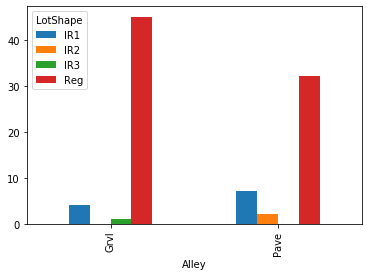

In [54]:
# display that


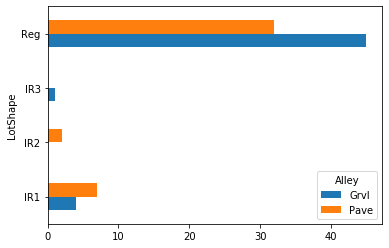

In [57]:
# Flip that


## Challenge

I hope you can see how we have used existing columns to create a new column on a dataset that say something new about our unit of observation. This is what making new features (columns) on a dataset is all about and why it's so essential to data science --particularly predictive modeling "Machine Learning." 

We'll spend the rest of the lecture and assignment today trying to get as good as we can at manipulating (cleaning) and creating new columns on datasets.

# [Objective](#work-with-strings) Work with Strings with Pandas

## Overview

So far we have worked with numeric datatypes (ints and floats) but we haven't worked with any columns containing string values. We can't simply use arithmetic to manipulate string values, so we'll need to learn some more techniques in order to work with this datatype.

## Follow Along

We're going to import a new dataset here to work with. This dataset is from LendingClub and holds information about loans issued in Q4 of 2018. This dataset is a bit messy so it will give us plenty of opportunities to clean up existing columns as well as create new ones.

The `!wget` shell command being used here does exactly the same thing that your browser does when you type a URL in the address. It makes a request or "gets" the file at that address. However, in our case the file isn't a webpage, it's a compressed CSV file. 

Try copying and pasting the URL from below into your browser, did it start an automatic download? Any URLs like this that start automatic downloads when navigated to can be used along with the `!wget` command to bring files directly into your notebook's memory.

### Load a new dataset

/bin/sh: wget: command not found


We need to use the `!unzip` command to extract the csv from the zipped folder.

As we look at the raw file itself, do you see anything that might cause us trouble as we read in the CSV file to a dataframe?

In [ ]:
# Read in the CSV


The extra rows at the top and bottom of the file have done two things:

1) The top row has made it so that the entire dataset is being interpreted as column headers

2) The bottom two rows have been read into the 'id' column and are causing every column to have at least two `NaN` values in it.

In [ ]:
# We can fix the header problem by using the 'skiprows' parameter


Lets look at the NaN values of each column so that you can see the problem that the extra rows at the bottom of the file are creating for us

In [ ]:
# Sum null values by column and sort from least to greatest

In [ ]:
# Address the extra NaNs in each column by skipping the footer as well.

For good measure, we'll also drop some columns that are made up completely of NaN values.

Why might LendingClub have included columns in their dataset that are 100% blank?

### Clean up the `int_rate` column

When we're preparing a dataset for a machine learning model we typically want to represent don't want to leave any string values in our dataset --because it's hard to do math on words. 

Specifically, we have a column that is representing a numeric value, but currently doesn't have a numeric datatype. Lets look at the first 10 values of the `int_rate` column

In [ ]:
# Look at the first 10 values of the int_rate column


In [ ]:
# Look at a specific value from the int_rate column


Problems that we need to address with this column:

- String column that should be numeric
- Percent Sign `%` included with the number
- Leading space at the beginning of the string

However, we're not going to try and write exactly the right code to fix this column in one go. We're going to methodically build up to the code that will help us address these problems.


In [ ]:
# Lets start with just fixing a single string.
# If we can fix one, we can usually fix all of them


In [ ]:
# remove leading space


In [ ]:
# remove percent


In [ ]:
# remove both


In [ ]:
# "Cast" the string value to a float


In [ ]:
# put it all together


### Write a function to make our solution reusable!

In [ ]:
# Write a function that can do what we have written above to any 
# string that is passsed to it.



In [ ]:
# Test out our function by calling it on our example


In [ ]:
# is the data type correct?


### Apply our solution to every cell in a column

In [ ]:
# for loop:


In [ ]:
# look at first 10 values of that list:


In [ ]:
# convert that list to a new column


In [ ]:
# What type of data is held in our new column?

# Look at the datatypes of the last 5 columns

In [ ]:
# improve all of this code with the .apply function!


## Challenge

We can create a new column with our cleaned values or overwrite the original, whatever we think best suits our needs. On your assignment you will take the same approach in trying to methodically build up the complexity of your code until you have a few lines that will work for any cell in a column. At that point you'll contain all of that functionality in a reusable function block and then use the `.apply()` function to... well... apply those changes to an entire column.

# [Objective](#pandas-apply) Modify and Create Columns using `.apply()`



## Overview

We're already seen one example of using the `.apply()` function to clean up a column. Lets see if we can do it again, but this time on a slightly more complicated use case.

Remember, the goal here is to write a function that will work correctly on any **individual** cell of a specific column. Then we can reuse that function on those individual cells of a dataframe column via the `.apply()` function.

Lets clean up the emp_title "Employment Title" column!

## Follow Along

First we'll try and diagnose how bad the problem is and what improvements we might be able to make.

In [ ]:
# Look at the top 20 employment titles


In [ ]:
# How many different unique employment titles are there currently?


In [ ]:
# How often is the employment_title null?


What are some possible reasons as to why a person's employment title may have not been provided?

In [ ]:
# Create some examples that represent the cases that we want to clean up


In [ ]:
# Write a function to clean up these use cases and increase uniformity.


In [ ]:
# create a for loop:


In [ ]:
# list comprehensions can combine function calls and for loops over lists
# into one succinct and fairly readable single line of code.


In [ ]:
# We have a function that works as expected. Lets apply it to our column.
# This time we'll overwrite the original column


We can use the same code as we did earlier to see how much progress was made.


In [ ]:
# Look at the top 20 employment titles

In [ ]:
# How many different unique employment titles are there currently?

In [ ]:
# How often is the employment_title null (NaN)?

## Challenge

Using the .apply() function isn't always about creating new columns on a dataframe, we can use it to clean up or modify existing columns as well. 

# [Objective](#dates-and-times) Work with Dates and Times with Pandas

## Overview

Pandas has its own datatype datatype that makes it extremely convenient to convert strings that are in standard date formates to datetime objects and then use those datetime objects to either create new features on a dataframe or work with the dataset in a timeseries fashion. 

This section will demonstrate how to take a column of date strings, convert it to a datetime object and then use the datetime formatting `.dt` to access specific parts of the date (year, month, day) to generate useful columns on a dataframe.

## Follow Along

### Work with Dates 

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

Many of the most useful date columns in this dataset have the suffix `_d` to indicate that they correspond to dates.

We'll use a list comprehension to print them out

In [ ]:
# as a for loop:

In [ ]:
# as a list comprehension:

Lets look at the string format of the `issue_d` column

Because this string format %m-%y is a common datetime format, we can just let Pandas detect this format and translate it to the appropriate datetime object.

In [ ]:
# infer_datetime_format=True


Now we can see that the `issue_d` column has been changed to hold `datetime` objects.

Lets look at one of the cells specifically to see what a datetime object looks like:

You can see how the month and year have been indicated by the strings that were contained in the column previously, and that the rest of the values have been inferred.

We can use the `.dt` accessor to now grab specific parts of the datetime object. Lets grab just the year from the all of the cells in the `issue_d` column

Now the month.

In [ ]:
# look at their types!


It's just that easy! Now, instead of printing them out, lets add these year and month values as new columns on our dataframe. Again, you'll have to scroll all the way over to the right in the table to see the new columns.

Because all of these dates come from Q4 of 2018, the `issue_d` column isn't all that interesting. Lets look at the `earliest_cr_line` column, which is also a string, but that could be converted to datetime format.

We're going to create a new column called `days_from_earliest_credit_to_issue`

It's a long column header, but think about how valuable this piece of information could be. This number will essentially indicate the length of a person's credit history and if that is correlated with repayment or other factors could be a valuable predictor!

In [ ]:
# date arithmetic


In [ ]:
# new column


What we're about to do is so cool! Pandas' datetime format is so smart that we can simply use the subtraction operator `-` in order to calculate the amount of time between two dates. 

Think about everything that's going on under the hood in order to give us such straightforward syntax! Handling months of different lengths, leap years, etc. Pandas datetime objects are seriously powerful!

What's oldest credit history that was involved in Q4 2018? 

25,171 days is ~ 68.96 years of credit history!

## Challenge

Pandas' datetime format is so easy to work with that there's really no excuse for not using dates to make features on a dataframe! Get ready to practice more of this on your assignment.